In [1]:
try : 
    import pyart
except : 
    !pip install arm-pyart --quiet 
    import pyart
    
try : 
    import netcdf4
except : 
    !pip install netcdf4 --quiet 
    import netCDF4
    
try : 
    import matplotlib.pyplot as plt
except :
    !pip install matplotlib
    import matplotlib.pyplot as plt
    
try : 
    import nextcloud_client
except :
    !pip install pyncclient --quiet   
    import nextcloud_client

import requests
from urllib.request import urlopen
import re
import os

exec(open('./connect_cloudUGA.py').read())
cloud = connect_cloudUGA()
list_f=cloud.list('ENSE3/DONNEES/RADAR-XPORT/')
files=[list_f[i].path for i in range(len(list_f))]
for i in range(len(files)) :
    print(i ,files[i])


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

········
0 /ENSE3/DONNEES/RADAR-XPORT/20220214_125241_01_simple_RHI130_sec.nc
1 /ENSE3/DONNEES/RADAR-XPORT/20220214_125259_01_simple_PPI9_all.nc
2 /ENSE3/DONNEES/RADAR-XPORT/20220214_125344_01_simple_PPI7.5_all.nc
3 /ENSE3/DONNEES/RADAR-XPORT/20220214_125408_00_triple_PPI9_all.nc
4 /ENSE3/DONNEES/RADAR-XPORT/20220214_125549_01_simple_PPI25_all.nc
5 /ENSE3/DONNEES/RADAR-XPORT/Readme.md


/ENSE3/DONNEES/RADAR-XPORT/20220214_125259_01_simple_PPI9_all.nc


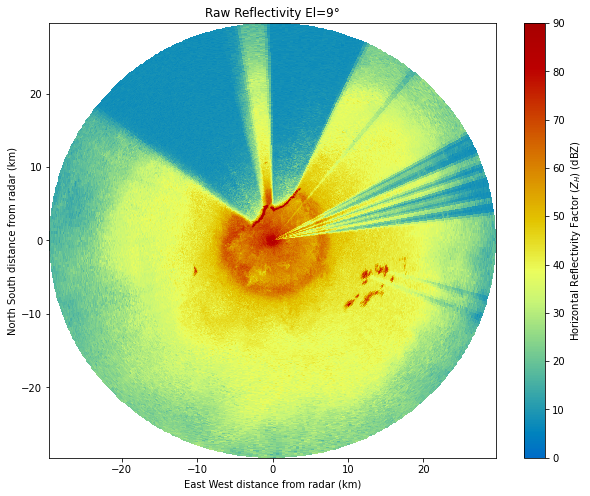

In [3]:
from urllib.request import urlopen
import requests
import re

exec(open('./Xport_utils/xport_cdf.py').read())
radarfile = files[1]
print(radarfile)
URL = return_long_url_file (cloud, files[1] )
URL = requests.get(URL)
url = urlopen(URL.url)
ncFile = 'empty_file'
ncdata = url.read()

radar = read_xport(ncFile, memory=ncdata)
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111)
display = pyart.graph.RadarDisplay(radar)
if radarfile.find('PPI') >= 0:
    el = re.search('PPI(.*)_all', radarfile).group(1)
    display.plot('reflectivity_horizontal', 0, vmin=0, vmax=90.,
             colorbar_label='Horizontal Reflectivity Factor ($Z_{H}$) (dBZ)', title='Raw Reflectivity El='+el+'°')
else :
    az = re.search('RHI(.*)_sec', radarfile).group(1)             
    display.plot_rhi('reflectivity_horizontal', 0, vmin=0, vmax=90.,
             colorbar_label='Horizontal Reflectivity Factor ($Z_{H}$) (dBZ)', title='Raw Reflectivity Az='+az+'°',colorbar_orient ="horizontal")
